Load all packages you need.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Read the data.

In [2]:
# Load the data
file_path = '../data/diabetes.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

Let's deal with the missing data points in "BloodPressure". <br>
First remove the outlier from the last coding break.<br>
Create a copy of the outlier-filtered data frame and impute the missing values with the "BloodPressure" median value.

Steps:

Remove the outliers detected in the last coding break.
Create a copy of the outlier-filtered DataFrame.
Impute the missing values in "BloodPressure" with the median value.

Create a second copy of the outlier-filtered data frame. <br>
Perform a hot-deck/distribution imputation. First, estimate the distribution parameters of "BloodPressure". Then, sample the values used for imputation.

In [3]:
# Filter out zero values in "BloodPressure"
df_filtered = df[df['BloodPressure'] > 0]

# Calculate Tukey's fences
Q1 = df_filtered['BloodPressure'].quantile(0.25)
Q3 = df_filtered['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Identify outliers using Tukey's fence
tukey_outliers = df_filtered[(df_filtered['BloodPressure'] < lower_fence) | (df_filtered['BloodPressure'] > upper_fence)]

# Remove outliers from the DataFrame
df_no_outliers = df_filtered[~df_filtered.index.isin(tukey_outliers.index)]

# Create a copy of the outlier-filtered DataFrame
df_imputed = df_no_outliers.copy()

# Impute missing values (zero values) in "BloodPressure" with the median value
median_bp = df_imputed['BloodPressure'].median()
df_imputed['BloodPressure'].replace(0, median_bp, inplace=True)

# Display the first few rows of the imputed DataFrame
df_imputed.head()

/var/folders/1p/567_4j5x29v48vc1mvjyth400000gp/T/ipykernel_27176/642914615.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed['BloodPressure'].replace(0, median_bp, inplace=True)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Create a third copy of the outlier-filtered data frame. <br>
Perform a regression-based imputation. First, choose 3 variables that are correlated with "BloodPressure" (Hint, create a correlation matrix or have a look at the "Associations"-Button in sweetviz).<br>
Second, fit a linear regression model with those three variables as predictors. Let's ignore for the moment that the other variables might also include outlier and missing data.<br>
Now, use the regression model to estimate the imputed value for each missing data point.

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Identify rows with missing "BloodPressure" values (zero values)
missing_bp_indices = df[df['BloodPressure'] == 0].index

# Filter out zero values in "BloodPressure" for outlier detection
df_filtered = df[df['BloodPressure'] > 0]

# Calculate Tukey's fences
Q1 = df_filtered['BloodPressure'].quantile(0.25)
Q3 = df_filtered['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Identify outliers using Tukey's fence
tukey_outliers = df_filtered[(df_filtered['BloodPressure'] < lower_fence) | (df_filtered['BloodPressure'] > upper_fence)]

# Remove outliers from the DataFrame
df_no_outliers = df_filtered[~df_filtered.index.isin(tukey_outliers.index)]

# Create a third copy of the outlier-filtered DataFrame
df_regression_imputed = df_no_outliers.copy()

# Create a correlation matrix to choose 3 variables correlated with "BloodPressure"
correlation_matrix = df_no_outliers.corr()
print(correlation_matrix['BloodPressure'])

# Choose 3 variables that are correlated with "BloodPressure"
# For example, let's choose 'Glucose', 'BMI', and 'Age' based on the correlation matrix
predictors = ['Glucose', 'BMI', 'Age']

# Separate the data into predictors (X) and target (y)
X = df_no_outliers[predictors]
y = df_no_outliers['BloodPressure']

# Fit a linear regression model
regressor = LinearRegression()
regressor.fit(X, y)

# Predict the missing "BloodPressure" values using the regression model
X_missing = df.loc[missing_bp_indices, predictors]
predicted_bp = regressor.predict(X_missing)

# Impute the missing values with the predicted values
df.loc[missing_bp_indices, 'BloodPressure'] = predicted_bp

# Display the first few rows of the regression-imputed DataFrame
df.head()

Pregnancies                 0.188676
Glucose                     0.214236
BloodPressure               1.000000
SkinThickness               0.022646
Insulin                    -0.045327
BMI                         0.262512
DiabetesPedigreeFunction    0.012876
Age                         0.323592
Outcome                     0.172952
Name: BloodPressure, dtype: float64


/var/folders/1p/567_4j5x29v48vc1mvjyth400000gp/T/ipykernel_27176/2027697046.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[71.94106107 70.28350907 56.40527686 54.91394191 74.64483863 54.90237993
 67.45094414 82.34879829 70.41406293 70.07202116 71.86952135 69.53207388
 72.61200378 80.46497121 75.7294431  65.63258156 78.47291137 56.3637929
 64.61575614 75.49432303 78.29312451 72.60789545 76.89292133 55.0819118
 57.24989027 69.64837626 69.78566151 63.98312573 66.55060821 73.29224689
 69.4888906  68.9148595  65.42257911 77.06269758 58.43044347]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[missing_bp_indices, 'BloodPressure'] = predicted_bp


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35,0,33.6,0.627,50,1
1,1,85,66.0,29,0,26.6,0.351,31,0
2,8,183,64.0,0,0,23.3,0.672,32,1
3,1,89,66.0,23,94,28.1,0.167,21,0
4,0,137,40.0,35,168,43.1,2.288,33,1


Now plot the original data next to the imputed data. Inspect the differences!

Pregnancies                 0.188676
Glucose                     0.214236
BloodPressure               1.000000
SkinThickness               0.022646
Insulin                    -0.045327
BMI                         0.262512
DiabetesPedigreeFunction    0.012876
Age                         0.323592
Outcome                     0.172952
Name: BloodPressure, dtype: float64


/var/folders/1p/567_4j5x29v48vc1mvjyth400000gp/T/ipykernel_27176/1049953990.py:59: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[71.94106107 70.28350907 56.40527686 54.91394191 74.64483863 54.90237993
 67.45094414 82.34879829 70.41406293 70.07202116 71.86952135 69.53207388
 72.61200378 80.46497121 75.7294431  65.63258156 78.47291137 56.3637929
 64.61575614 75.49432303 78.29312451 72.60789545 76.89292133 55.0819118
 57.24989027 69.64837626 69.78566151 63.98312573 66.55060821 73.29224689
 69.4888906  68.9148595  65.42257911 77.06269758 58.43044347]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_imputed.loc[missing_bp_indices, 'BloodPressure'] = predicted_bp


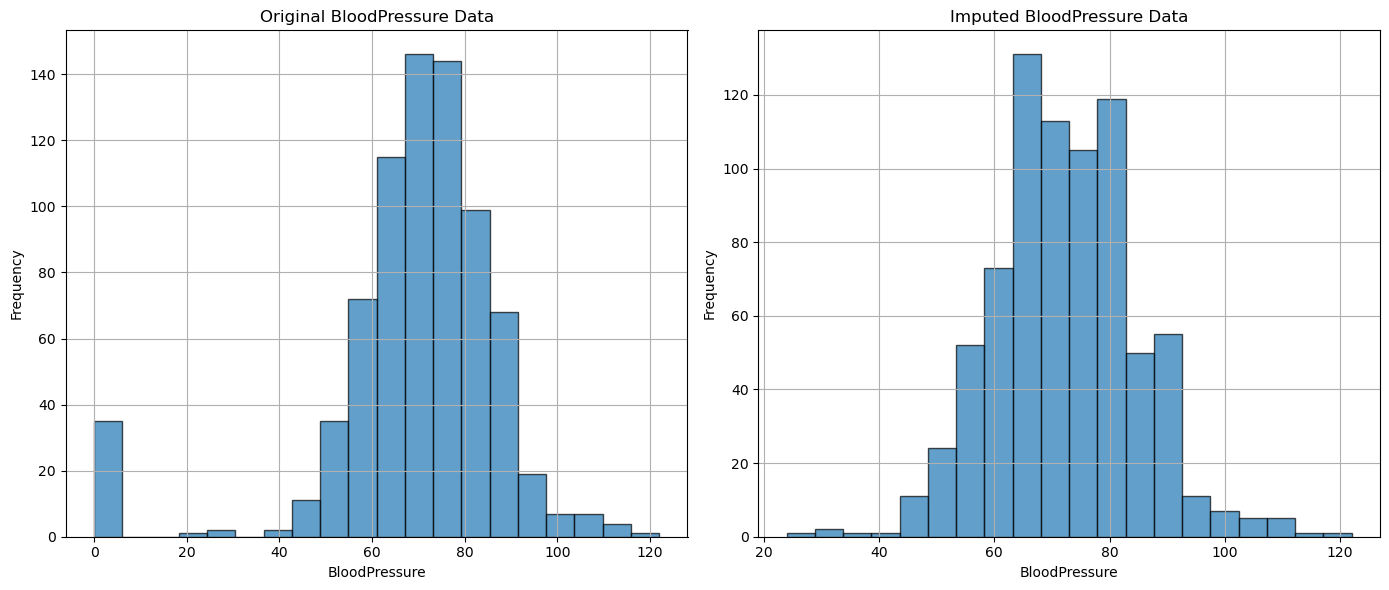

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the data
file_path = '../data/diabetes.csv'
df = pd.read_csv(file_path)

# Identify rows with missing "BloodPressure" values (zero values)
missing_bp_indices = df[df['BloodPressure'] == 0].index

# Filter out zero values in "BloodPressure" for outlier detection
df_filtered = df[df['BloodPressure'] > 0]

# Calculate Tukey's fences
Q1 = df_filtered['BloodPressure'].quantile(0.25)
Q3 = df_filtered['BloodPressure'].quantile(0.75)
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Identify outliers using Tukey's fence
tukey_outliers = df_filtered[(df_filtered['BloodPressure'] < lower_fence) | (df_filtered['BloodPressure'] > upper_fence)]

# Remove outliers from the DataFrame
df_no_outliers = df_filtered[~df_filtered.index.isin(tukey_outliers.index)]

# Create a third copy of the outlier-filtered DataFrame
df_regression_imputed = df_no_outliers.copy()

# Create a correlation matrix to choose 3 variables correlated with "BloodPressure"
correlation_matrix = df_no_outliers.corr()
print(correlation_matrix['BloodPressure'])

# Choose 3 variables that are correlated with "BloodPressure"
# For example, let's choose 'Glucose', 'BMI', and 'Age' based on the correlation matrix
predictors = ['Glucose', 'BMI', 'Age']

# Separate the data into predictors (X) and target (y)
X = df_no_outliers[predictors]
y = df_no_outliers['BloodPressure']

# Fit a linear regression model
regressor = LinearRegression()
regressor.fit(X, y)

# Predict the missing "BloodPressure" values using the regression model
X_missing = df.loc[missing_bp_indices, predictors]

# Ensure there are no missing values in the predictors
X_missing = X_missing.dropna()

# Predict the missing "BloodPressure" values
predicted_bp = regressor.predict(X_missing)

# Impute the missing values with the predicted values
df_imputed = df.copy()
df_imputed.loc[missing_bp_indices, 'BloodPressure'] = predicted_bp

# Plot the original data next to the imputed data
plt.figure(figsize=(14, 6))

# Original data
plt.subplot(1, 2, 1)
plt.hist(df['BloodPressure'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Original BloodPressure Data')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.grid(True)

# Imputed data
plt.subplot(1, 2, 2)
plt.hist(df_imputed['BloodPressure'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Imputed BloodPressure Data')
plt.xlabel('BloodPressure')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()